In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
n_sensors = 5
#n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 10:15]

In [7]:
x_5degree.shape

(438, 5)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 5, 1)


In [18]:
print(x_test.shape)

(44, 5, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 5)                 0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               3072      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 5ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.1010
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0982
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0926
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0867
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0846
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0581
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0578
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0566
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0563
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0557
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0380
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0376
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0375
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 173/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0369
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0368
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 9.0050e-04 - rmse: 0.0273
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9583e-04 - rmse: 0.0272
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8810e-04 - rmse: 0.0271
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8574e-04 - rmse: 0.0270
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8083e-04 - rmse: 0.0269
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7513e-04 - rmse: 0.0268
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7169e-04 - rmse: 0.0267
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6856e-04 - rmse: 0.0267
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6290e-04 - rmse: 0.0266
Epoch 258/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5733e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 5.7192e-04 - rmse: 0.0204
Epoch 329/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7196e-04 - rmse: 0.0204
Epoch 330/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7072e-04 - rmse: 0.0204
Epoch 331/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7129e-04 - rmse: 0.0204
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6709e-04 - rmse: 0.0203
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6610e-04 - rmse: 0.0203
Epoch 334/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6390e-04 - rmse: 0.0202
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5676e-04 - rmse: 0.0200
Epoch 336/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5296e-04 - rmse: 0.0199
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5046e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 4.1498e-04 - rmse: 0.0162
Epoch 408/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2109e-04 - rmse: 0.0164
Epoch 409/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2332e-04 - rmse: 0.0164
Epoch 410/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1624e-04 - rmse: 0.0162
Epoch 411/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1820e-04 - rmse: 0.0163
Epoch 412/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1521e-04 - rmse: 0.0162
Epoch 413/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1545e-04 - rmse: 0.0162
Epoch 414/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1418e-04 - rmse: 0.0162
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1319e-04 - rmse: 0.0161
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0798e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 3.3858e-04 - rmse: 0.0137
Epoch 487/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3871e-04 - rmse: 0.0137
Epoch 488/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3834e-04 - rmse: 0.0137
Epoch 489/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3775e-04 - rmse: 0.0137
Epoch 490/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3664e-04 - rmse: 0.0137
Epoch 491/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3715e-04 - rmse: 0.0137
Epoch 492/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3523e-04 - rmse: 0.0136
Epoch 493/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3342e-04 - rmse: 0.0136
Epoch 494/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3076e-04 - rmse: 0.0135
Epoch 495/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2999e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.9255e-04 - rmse: 0.0121
Epoch 566/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8961e-04 - rmse: 0.0120
Epoch 567/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9200e-04 - rmse: 0.0121
Epoch 568/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8939e-04 - rmse: 0.0120
Epoch 569/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8868e-04 - rmse: 0.0119
Epoch 570/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8831e-04 - rmse: 0.0119
Epoch 571/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9047e-04 - rmse: 0.0120
Epoch 572/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8839e-04 - rmse: 0.0119
Epoch 573/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8945e-04 - rmse: 0.0120
Epoch 574/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8780e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.5911e-04 - rmse: 0.0108
Epoch 645/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5837e-04 - rmse: 0.0108
Epoch 646/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5823e-04 - rmse: 0.0108
Epoch 647/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5670e-04 - rmse: 0.0107
Epoch 648/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5728e-04 - rmse: 0.0107
Epoch 649/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6074e-04 - rmse: 0.0109
Epoch 650/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6087e-04 - rmse: 0.0109
Epoch 651/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5975e-04 - rmse: 0.0108
Epoch 652/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5945e-04 - rmse: 0.0108
Epoch 653/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5803e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.3958e-04 - rmse: 0.0100
Epoch 724/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3740e-04 - rmse: 0.0099
Epoch 725/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3531e-04 - rmse: 0.0098
Epoch 726/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3442e-04 - rmse: 0.0098
Epoch 727/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3528e-04 - rmse: 0.0098
Epoch 728/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3819e-04 - rmse: 0.0100
Epoch 729/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4161e-04 - rmse: 0.0102
Epoch 730/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3842e-04 - rmse: 0.0100
Epoch 731/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3907e-04 - rmse: 0.0100
Epoch 732/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4209e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.2600e-04 - rmse: 0.0095
Epoch 803/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2269e-04 - rmse: 0.0094
Epoch 804/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2059e-04 - rmse: 0.0093
Epoch 805/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1939e-04 - rmse: 0.0092
Epoch 806/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1907e-04 - rmse: 0.0092
Epoch 807/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1827e-04 - rmse: 0.0091
Epoch 808/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1725e-04 - rmse: 0.0091
Epoch 809/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1614e-04 - rmse: 0.0090
Epoch 810/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1958e-04 - rmse: 0.0092
Epoch 811/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1965e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.0914e-04 - rmse: 0.0088
Epoch 882/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0823e-04 - rmse: 0.0088
Epoch 883/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0590e-04 - rmse: 0.0086
Epoch 884/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0654e-04 - rmse: 0.0087
Epoch 885/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0541e-04 - rmse: 0.0086
Epoch 886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0764e-04 - rmse: 0.0088
Epoch 887/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0720e-04 - rmse: 0.0087
Epoch 888/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0588e-04 - rmse: 0.0087
Epoch 889/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0538e-04 - rmse: 0.0086
Epoch 890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0727e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.9734e-04 - rmse: 0.0083
Epoch 961/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9474e-04 - rmse: 0.0082
Epoch 962/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9404e-04 - rmse: 0.0082
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9316e-04 - rmse: 0.0081
Epoch 964/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9942e-04 - rmse: 0.0085
Epoch 965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0050e-04 - rmse: 0.0085
Epoch 966/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0095e-04 - rmse: 0.0086
Epoch 967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9830e-04 - rmse: 0.0084
Epoch 968/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9643e-04 - rmse: 0.0083
Epoch 969/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9693e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.8428e-04 - rmse: 0.0077
Epoch 1040/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8476e-04 - rmse: 0.0078
Epoch 1041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8716e-04 - rmse: 0.0079
Epoch 1042/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8837e-04 - rmse: 0.0080
Epoch 1043/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8713e-04 - rmse: 0.0079
Epoch 1044/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8679e-04 - rmse: 0.0079
Epoch 1045/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8562e-04 - rmse: 0.0078
Epoch 1046/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8626e-04 - rmse: 0.0079
Epoch 1047/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8563e-04 - rmse: 0.0079
Epoch 1048/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.7712e-04 - rmse: 0.0075
Epoch 1118/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7851e-04 - rmse: 0.0076
Epoch 1119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7785e-04 - rmse: 0.0075
Epoch 1120/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7594e-04 - rmse: 0.0074
Epoch 1121/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7623e-04 - rmse: 0.0074
Epoch 1122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7683e-04 - rmse: 0.0075
Epoch 1123/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7939e-04 - rmse: 0.0076
Epoch 1124/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7943e-04 - rmse: 0.0077
Epoch 1125/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7930e-04 - rmse: 0.0076
Epoch 1126/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.7209e-04 - rmse: 0.0073
Epoch 1196/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7299e-04 - rmse: 0.0074
Epoch 1197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7204e-04 - rmse: 0.0073
Epoch 1198/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7156e-04 - rmse: 0.0073
Epoch 1199/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7289e-04 - rmse: 0.0074
Epoch 1200/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7239e-04 - rmse: 0.0074
Epoch 1201/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7239e-04 - rmse: 0.0074
Epoch 1202/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7286e-04 - rmse: 0.0074
Epoch 1203/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7361e-04 - rmse: 0.0075
Epoch 1204/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6716e-04 - rmse: 0.0072
Epoch 1274/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6570e-04 - rmse: 0.0071
Epoch 1275/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6486e-04 - rmse: 0.0070
Epoch 1276/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6414e-04 - rmse: 0.0070
Epoch 1277/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6570e-04 - rmse: 0.0071
Epoch 1278/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6614e-04 - rmse: 0.0071
Epoch 1279/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6570e-04 - rmse: 0.0071
Epoch 1280/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6406e-04 - rmse: 0.0070
Epoch 1281/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6315e-04 - rmse: 0.0069
Epoch 1282/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5918e-04 - rmse: 0.0068
Epoch 1352/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5856e-04 - rmse: 0.0068
Epoch 1353/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5823e-04 - rmse: 0.0068
Epoch 1354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6096e-04 - rmse: 0.0070
Epoch 1355/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5720e-04 - rmse: 0.0067
Epoch 1356/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5769e-04 - rmse: 0.0067
Epoch 1357/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5747e-04 - rmse: 0.0067
Epoch 1358/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5674e-04 - rmse: 0.0067
Epoch 1359/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5712e-04 - rmse: 0.0067
Epoch 1360/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5742e-04 - rmse: 0.0069
Epoch 1430/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5619e-04 - rmse: 0.0068
Epoch 1431/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5483e-04 - rmse: 0.0067
Epoch 1432/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5245e-04 - rmse: 0.0065
Epoch 1433/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5081e-04 - rmse: 0.0064
Epoch 1434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5001e-04 - rmse: 0.0063
Epoch 1435/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5375e-04 - rmse: 0.0066
Epoch 1436/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5387e-04 - rmse: 0.0066
Epoch 1437/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5465e-04 - rmse: 0.0067
Epoch 1438/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.4984e-04 - rmse: 0.0065
Epoch 1508/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5026e-04 - rmse: 0.0065
Epoch 1509/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5147e-04 - rmse: 0.0066
Epoch 1510/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5009e-04 - rmse: 0.0065
Epoch 1511/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4944e-04 - rmse: 0.0065
Epoch 1512/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4729e-04 - rmse: 0.0063
Epoch 1513/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4500e-04 - rmse: 0.0061
Epoch 1514/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4578e-04 - rmse: 0.0062
Epoch 1515/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4812e-04 - rmse: 0.0064
Epoch 1516/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.5153e-04 - rmse: 0.0068
Epoch 1586/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4787e-04 - rmse: 0.0065
Epoch 1587/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4849e-04 - rmse: 0.0066
Epoch 1588/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4594e-04 - rmse: 0.0064
Epoch 1589/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4242e-04 - rmse: 0.0061
Epoch 1590/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4345e-04 - rmse: 0.0062
Epoch 1591/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4074e-04 - rmse: 0.0060
Epoch 1592/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4200e-04 - rmse: 0.0061
Epoch 1593/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4305e-04 - rmse: 0.0062
Epoch 1594/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.5028e-04 - rmse: 0.0069
Epoch 1664/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5486e-04 - rmse: 0.0072
Epoch 1665/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4854e-04 - rmse: 0.0067
Epoch 1666/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4809e-04 - rmse: 0.0067
Epoch 1667/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4404e-04 - rmse: 0.0064
Epoch 1668/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4374e-04 - rmse: 0.0064
Epoch 1669/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4020e-04 - rmse: 0.0061
Epoch 1670/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4063e-04 - rmse: 0.0061
Epoch 1671/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3698e-04 - rmse: 0.0058
Epoch 1672/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3250e-04 - rmse: 0.0056
Epoch 1742/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3165e-04 - rmse: 0.0055
Epoch 1743/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3131e-04 - rmse: 0.0055
Epoch 1744/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3252e-04 - rmse: 0.0056
Epoch 1745/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3396e-04 - rmse: 0.0057
Epoch 1746/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3345e-04 - rmse: 0.0057
Epoch 1747/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3281e-04 - rmse: 0.0056
Epoch 1748/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3231e-04 - rmse: 0.0056
Epoch 1749/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3482e-04 - rmse: 0.0058
Epoch 1750/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.2955e-04 - rmse: 0.0055
Epoch 1820/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2952e-04 - rmse: 0.0055
Epoch 1821/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2934e-04 - rmse: 0.0055
Epoch 1822/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3120e-04 - rmse: 0.0057
Epoch 1823/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3070e-04 - rmse: 0.0056
Epoch 1824/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3330e-04 - rmse: 0.0058
Epoch 1825/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3231e-04 - rmse: 0.0058
Epoch 1826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2938e-04 - rmse: 0.0055
Epoch 1827/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2984e-04 - rmse: 0.0055
Epoch 1828/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3241e-04 - rmse: 0.0059
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3196e-04 - rmse: 0.0059
Epoch 1899/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3310e-04 - rmse: 0.0060
Epoch 1900/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2981e-04 - rmse: 0.0057
Epoch 1901/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2984e-04 - rmse: 0.0057
Epoch 1902/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2785e-04 - rmse: 0.0055
Epoch 1903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2889e-04 - rmse: 0.0056
Epoch 1904/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4104e-04 - rmse: 0.0066
Epoch 1905/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3760e-04 - rmse: 0.0064
Epoch 1906/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.2510e-04 - rmse: 0.0054
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2389e-04 - rmse: 0.0053
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2246e-04 - rmse: 0.0052
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2491e-04 - rmse: 0.0054
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2455e-04 - rmse: 0.0054
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2512e-04 - rmse: 0.0054
Epoch 1981/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2577e-04 - rmse: 0.0055
Epoch 1982/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2979e-04 - rmse: 0.0059
Epoch 1983/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2676e-04 - rmse: 0.0056
Epoch 1984/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2052e-04 - rmse: 0.0052
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1914e-04 - rmse: 0.0050
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2057e-04 - rmse: 0.0052
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2221e-04 - rmse: 0.0053
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2278e-04 - rmse: 0.0054
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2178e-04 - rmse: 0.0053
Epoch 2059/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1877e-04 - rmse: 0.0050
Epoch 2060/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2008e-04 - rmse: 0.0051
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2008e-04 - rmse: 0.0051
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1689e-04 - rmse: 0.0050
Epoch 2132/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1802e-04 - rmse: 0.0051
Epoch 2133/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2042e-04 - rmse: 0.0053
Epoch 2134/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2097e-04 - rmse: 0.0054
Epoch 2135/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2075e-04 - rmse: 0.0054
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1978e-04 - rmse: 0.0053
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1990e-04 - rmse: 0.0053
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1709e-04 - rmse: 0.0050
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1824e-04 - rmse: 0.0051
Epoch 2140/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1629e-04 - rmse: 0.0051
Epoch 2210/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1526e-04 - rmse: 0.0050
Epoch 2211/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1486e-04 - rmse: 0.0049
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1729e-04 - rmse: 0.0052
Epoch 2213/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1739e-04 - rmse: 0.0052
Epoch 2214/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1833e-04 - rmse: 0.0053
Epoch 2215/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1681e-04 - rmse: 0.0051
Epoch 2216/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2033e-04 - rmse: 0.0055
Epoch 2217/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1814e-04 - rmse: 0.0053
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1013e-04 - rmse: 0.0046
Epoch 2288/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1252e-04 - rmse: 0.0049
Epoch 2289/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1219e-04 - rmse: 0.0048
Epoch 2290/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1250e-04 - rmse: 0.0049
Epoch 2291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1332e-04 - rmse: 0.0050
Epoch 2292/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1357e-04 - rmse: 0.0050
Epoch 2293/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1260e-04 - rmse: 0.0049
Epoch 2294/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1437e-04 - rmse: 0.0051
Epoch 2295/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1301e-04 - rmse: 0.0049
Epoch 2296/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1179e-04 - rmse: 0.0049
Epoch 2366/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1217e-04 - rmse: 0.0050
Epoch 2367/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1130e-04 - rmse: 0.0049
Epoch 2368/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0995e-04 - rmse: 0.0048
Epoch 2369/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1419e-04 - rmse: 0.0052
Epoch 2370/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1590e-04 - rmse: 0.0054
Epoch 2371/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1154e-04 - rmse: 0.0049
Epoch 2372/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0930e-04 - rmse: 0.0047
Epoch 2373/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0977e-04 - rmse: 0.0048
Epoch 2374/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0841e-04 - rmse: 0.0047
Epoch 2444/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0879e-04 - rmse: 0.0048
Epoch 2445/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0860e-04 - rmse: 0.0048
Epoch 2446/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0814e-04 - rmse: 0.0047
Epoch 2447/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0861e-04 - rmse: 0.0048
Epoch 2448/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0761e-04 - rmse: 0.0047
Epoch 2449/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0799e-04 - rmse: 0.0047
Epoch 2450/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0793e-04 - rmse: 0.0047
Epoch 2451/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1051e-04 - rmse: 0.0050
Epoch 2452/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.1061e-04 - rmse: 0.0051
Epoch 2522/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1633e-04 - rmse: 0.0056
Epoch 2523/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1351e-04 - rmse: 0.0054
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0889e-04 - rmse: 0.0049
Epoch 2525/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0597e-04 - rmse: 0.0046
Epoch 2526/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0596e-04 - rmse: 0.0046
Epoch 2527/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0614e-04 - rmse: 0.0047
Epoch 2528/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0706e-04 - rmse: 0.0048
Epoch 2529/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1328e-04 - rmse: 0.0054
Epoch 2530/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0553e-04 - rmse: 0.0047
Epoch 2600/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0447e-04 - rmse: 0.0046
Epoch 2601/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0463e-04 - rmse: 0.0046
Epoch 2602/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0500e-04 - rmse: 0.0047
Epoch 2603/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0529e-04 - rmse: 0.0047
Epoch 2604/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0945e-04 - rmse: 0.0051
Epoch 2605/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0948e-04 - rmse: 0.0051
Epoch 2606/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0871e-04 - rmse: 0.0051
Epoch 2607/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0744e-04 - rmse: 0.0049
Epoch 2608/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0196e-04 - rmse: 0.0045
Epoch 2678/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0369e-04 - rmse: 0.0047
Epoch 2679/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0551e-04 - rmse: 0.0049
Epoch 2680/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0326e-04 - rmse: 0.0046
Epoch 2681/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0665e-04 - rmse: 0.0050
Epoch 2682/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0306e-04 - rmse: 0.0046
Epoch 2683/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0245e-04 - rmse: 0.0045
Epoch 2684/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0354e-04 - rmse: 0.0047
Epoch 2685/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0257e-04 - rmse: 0.0046
Epoch 2686/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.9696e-05 - rmse: 0.0044
Epoch 2756/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0111e-04 - rmse: 0.0045
Epoch 2757/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9628e-05 - rmse: 0.0044
Epoch 2758/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9375e-05 - rmse: 0.0043
Epoch 2759/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0298e-04 - rmse: 0.0047
Epoch 2760/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0231e-04 - rmse: 0.0047
Epoch 2761/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0141e-04 - rmse: 0.0046
Epoch 2762/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0294e-04 - rmse: 0.0047
Epoch 2763/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0333e-04 - rmse: 0.0048
Epoch 2764/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.7421e-05 - rmse: 0.0042
Epoch 2834/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8175e-05 - rmse: 0.0043
Epoch 2835/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9635e-05 - rmse: 0.0045
Epoch 2836/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0304e-04 - rmse: 0.0049
Epoch 2837/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0069e-04 - rmse: 0.0046
Epoch 2838/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0113e-04 - rmse: 0.0047
Epoch 2839/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0315e-04 - rmse: 0.0049
Epoch 2840/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0120e-04 - rmse: 0.0047
Epoch 2841/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8355e-05 - rmse: 0.0044
Epoch 2842/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.8695e-05 - rmse: 0.0045
Epoch 2912/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8969e-05 - rmse: 0.0045
Epoch 2913/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0072e-04 - rmse: 0.0047
Epoch 2914/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8298e-05 - rmse: 0.0045
Epoch 2915/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6684e-05 - rmse: 0.0043
Epoch 2916/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5956e-05 - rmse: 0.0042
Epoch 2917/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0180e-04 - rmse: 0.0049
Epoch 2918/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0170e-04 - rmse: 0.0048
Epoch 2919/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9571e-05 - rmse: 0.0046
Epoch 2920/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.7838e-05 - rmse: 0.0045
Epoch 2990/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0060e-04 - rmse: 0.0048
Epoch 2991/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8586e-05 - rmse: 0.0046
Epoch 2992/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8426e-05 - rmse: 0.0046
Epoch 2993/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7531e-05 - rmse: 0.0045
Epoch 2994/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5283e-05 - rmse: 0.0043
Epoch 2995/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4318e-05 - rmse: 0.0041
Epoch 2996/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7333e-05 - rmse: 0.0045
Epoch 2997/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6252e-05 - rmse: 0.0044
Epoch 2998/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4

10/10 [==============================] - 0s 5ms/step - loss: 9.7722e-05 - rmse: 0.0046
Epoch 3068/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6235e-05 - rmse: 0.0045
Epoch 3069/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4537e-05 - rmse: 0.0043
Epoch 3070/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3601e-05 - rmse: 0.0042
Epoch 3071/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3190e-05 - rmse: 0.0041
Epoch 3072/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3042e-05 - rmse: 0.0041
Epoch 3073/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3142e-05 - rmse: 0.0041
Epoch 3074/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4196e-05 - rmse: 0.0043
Epoch 3075/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2423e-05 - rmse: 0.0040
Epoch 3076/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.0923e-05 - rmse: 0.0040
Epoch 3146/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4638e-05 - rmse: 0.0044
Epoch 3147/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3281e-05 - rmse: 0.0043
Epoch 3148/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3902e-05 - rmse: 0.0043
Epoch 3149/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3754e-05 - rmse: 0.0043
Epoch 3150/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2009e-05 - rmse: 0.0041
Epoch 3151/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1212e-05 - rmse: 0.0040
Epoch 3152/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1125e-05 - rmse: 0.0040
Epoch 3153/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3545e-05 - rmse: 0.0043
Epoch 3154/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.2321e-05 - rmse: 0.0043
Epoch 3224/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1106e-05 - rmse: 0.0041
Epoch 3225/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1089e-05 - rmse: 0.0041
Epoch 3226/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9754e-05 - rmse: 0.0040
Epoch 3227/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9546e-05 - rmse: 0.0039
Epoch 3228/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6801e-05 - rmse: 0.0048
Epoch 3229/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3941e-05 - rmse: 0.0045
Epoch 3230/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2586e-05 - rmse: 0.0043
Epoch 3231/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1068e-05 - rmse: 0.0041
Epoch 3232/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 5ms/step - loss: 9.2263e-05 - rmse: 0.0044
Epoch 3302/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9736e-05 - rmse: 0.0041
Epoch 3303/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8182e-05 - rmse: 0.0039
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8427e-05 - rmse: 0.0039
Epoch 3305/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2024e-05 - rmse: 0.0044
Epoch 3306/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3464e-05 - rmse: 0.0045
Epoch 3307/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1765e-05 - rmse: 0.0043
Epoch 3308/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9545e-05 - rmse: 0.0041
Epoch 3309/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9922e-05 - rmse: 0.0041
Epoch 3310/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 8.9105e-05 - rmse: 0.0041
Epoch 3380/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6389e-05 - rmse: 0.0038
Epoch 3381/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7484e-05 - rmse: 0.0039
Epoch 3382/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7738e-05 - rmse: 0.0040
Epoch 3383/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7622e-05 - rmse: 0.0039
Epoch 3384/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6864e-05 - rmse: 0.0038
Epoch 3385/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6863e-05 - rmse: 0.0038
Epoch 3386/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8286e-05 - rmse: 0.0040
Epoch 3387/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8510e-05 - rmse: 0.0041
Epoch 3388/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.9415e-05 - rmse: 0.0043
Epoch 3458/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9639e-05 - rmse: 0.0043
Epoch 3459/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9011e-05 - rmse: 0.0042
Epoch 3460/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6321e-05 - rmse: 0.0050
Epoch 3461/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5031e-05 - rmse: 0.0049
Epoch 3462/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2845e-05 - rmse: 0.0047
Epoch 3463/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8042e-05 - rmse: 0.0052
Epoch 3464/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5282e-05 - rmse: 0.0049
Epoch 3465/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2474e-05 - rmse: 0.0046
Epoch 3466/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 8.4472e-05 - rmse: 0.0038
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4914e-05 - rmse: 0.0038
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5155e-05 - rmse: 0.0039
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5605e-05 - rmse: 0.0039
Epoch 3539/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7720e-05 - rmse: 0.0042
Epoch 3540/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6474e-05 - rmse: 0.0040
Epoch 3541/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4850e-05 - rmse: 0.0038
Epoch 3542/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6745e-05 - rmse: 0.0041
Epoch 3543/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5930e-05 - rmse: 0.0040
Epoch 3544/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.7134e-05 - rmse: 0.0042
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6890e-05 - rmse: 0.0042
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8228e-05 - rmse: 0.0043
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6707e-05 - rmse: 0.0042
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6663e-05 - rmse: 0.0042
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3738e-05 - rmse: 0.0038
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2890e-05 - rmse: 0.0037
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2283e-05 - rmse: 0.0036
Epoch 3621/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7103e-05 - rmse: 0.0042
Epoch 3622/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.4710e-05 - rmse: 0.0040
Epoch 3692/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5197e-05 - rmse: 0.0041
Epoch 3693/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3287e-05 - rmse: 0.0038
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4499e-05 - rmse: 0.0040
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3571e-05 - rmse: 0.0039
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2985e-05 - rmse: 0.0038
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6526e-05 - rmse: 0.0042
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5482e-05 - rmse: 0.0041
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5030e-05 - rmse: 0.0041
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.5748e-05 - rmse: 0.0042
Epoch 3770/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3445e-05 - rmse: 0.0040
Epoch 3771/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2978e-05 - rmse: 0.0039
Epoch 3772/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3862e-05 - rmse: 0.0040
Epoch 3773/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1930e-05 - rmse: 0.0038
Epoch 3774/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5257e-05 - rmse: 0.0042
Epoch 3775/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4229e-05 - rmse: 0.0041
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2876e-05 - rmse: 0.0039
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2687e-05 - rmse: 0.0039
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.2570e-05 - rmse: 0.0039
Epoch 3848/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2516e-05 - rmse: 0.0039
Epoch 3849/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4099e-05 - rmse: 0.0041
Epoch 3850/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2699e-05 - rmse: 0.0040
Epoch 3851/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4071e-05 - rmse: 0.0041
Epoch 3852/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1525e-05 - rmse: 0.0038
Epoch 3853/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0574e-05 - rmse: 0.0037
Epoch 3854/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0966e-05 - rmse: 0.0037
Epoch 3855/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3711e-05 - rmse: 0.0041
Epoch 3856/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.1886e-05 - rmse: 0.0040
Epoch 3926/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2692e-05 - rmse: 0.0041
Epoch 3927/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1756e-05 - rmse: 0.0039
Epoch 3928/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1295e-05 - rmse: 0.0039
Epoch 3929/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2718e-05 - rmse: 0.0041
Epoch 3930/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1552e-05 - rmse: 0.0039
Epoch 3931/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0160e-05 - rmse: 0.0037
Epoch 3932/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9614e-05 - rmse: 0.0037
Epoch 3933/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9782e-05 - rmse: 0.0037
Epoch 3934/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 7.9981e-05 - rmse: 0.0038
Epoch 4004/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8308e-05 - rmse: 0.0036
Epoch 4005/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8363e-05 - rmse: 0.0036
Epoch 4006/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0810e-05 - rmse: 0.0039
Epoch 4007/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0287e-05 - rmse: 0.0039
Epoch 4008/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9985e-05 - rmse: 0.0038
Epoch 4009/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2981e-05 - rmse: 0.0042
Epoch 4010/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2023e-05 - rmse: 0.0041
Epoch 4011/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4299e-05 - rmse: 0.0043
Epoch 4012/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.1595e-05 - rmse: 0.0041
Epoch 4082/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2000e-05 - rmse: 0.0042
Epoch 4083/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9466e-05 - rmse: 0.0038
Epoch 4084/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7686e-05 - rmse: 0.0036
Epoch 4085/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8743e-05 - rmse: 0.0037
Epoch 4086/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2650e-05 - rmse: 0.0042
Epoch 4087/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9781e-05 - rmse: 0.0039
Epoch 4088/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0009e-05 - rmse: 0.0039
Epoch 4089/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8566e-05 - rmse: 0.0037
Epoch 4090/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 8.1701e-05 - rmse: 0.0042
Epoch 4160/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0165e-05 - rmse: 0.0040
Epoch 4161/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0847e-05 - rmse: 0.0041
Epoch 4162/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9476e-05 - rmse: 0.0039
Epoch 4163/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8395e-05 - rmse: 0.0038
Epoch 4164/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9970e-05 - rmse: 0.0040
Epoch 4165/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9285e-05 - rmse: 0.0039
Epoch 4166/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8264e-05 - rmse: 0.0038
Epoch 4167/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8119e-05 - rmse: 0.0038
Epoch 4168/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 7.5090e-05 - rmse: 0.0034
Epoch 4238/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8473e-05 - rmse: 0.0039
Epoch 4239/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0348e-05 - rmse: 0.0041
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5783e-05 - rmse: 0.0047
Epoch 4241/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2932e-05 - rmse: 0.0044
Epoch 4242/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0602e-05 - rmse: 0.0042
Epoch 4243/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0182e-05 - rmse: 0.0041
Epoch 4244/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7945e-05 - rmse: 0.0038
Epoch 4245/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6894e-05 - rmse: 0.0037
Epoch 4246/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.6120e-05 - rmse: 0.0037
Epoch 4316/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7106e-05 - rmse: 0.0038
Epoch 4317/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5096e-05 - rmse: 0.0035
Epoch 4318/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4376e-05 - rmse: 0.0034
Epoch 4319/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3354e-05 - rmse: 0.0033
Epoch 4320/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3267e-05 - rmse: 0.0033
Epoch 4321/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4066e-05 - rmse: 0.0034
Epoch 4322/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4424e-05 - rmse: 0.0034
Epoch 4323/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3782e-05 - rmse: 0.0033
Epoch 4324/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.7151e-05 - rmse: 0.0039
Epoch 4394/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4591e-05 - rmse: 0.0035
Epoch 4395/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3930e-05 - rmse: 0.0035
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6326e-05 - rmse: 0.0038
Epoch 4397/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6600e-05 - rmse: 0.0038
Epoch 4398/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6059e-05 - rmse: 0.0038
Epoch 4399/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4321e-05 - rmse: 0.0035
Epoch 4400/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5180e-05 - rmse: 0.0036
Epoch 4401/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0871e-05 - rmse: 0.0043
Epoch 4402/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.4743e-05 - rmse: 0.0037
Epoch 4472/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6325e-05 - rmse: 0.0039
Epoch 4473/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4646e-05 - rmse: 0.0036
Epoch 4474/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5519e-05 - rmse: 0.0038
Epoch 4475/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3834e-05 - rmse: 0.0035
Epoch 4476/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4560e-05 - rmse: 0.0036
Epoch 4477/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4353e-05 - rmse: 0.0036
Epoch 4478/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7416e-05 - rmse: 0.0040
Epoch 4479/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5992e-05 - rmse: 0.0038
Epoch 4480/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 8.2291e-05 - rmse: 0.0046
Epoch 4550/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6267e-05 - rmse: 0.0039
Epoch 4551/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3483e-05 - rmse: 0.0036
Epoch 4552/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2145e-05 - rmse: 0.0034
Epoch 4553/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1905e-05 - rmse: 0.0033
Epoch 4554/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2291e-05 - rmse: 0.0034
Epoch 4555/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1587e-05 - rmse: 0.0033
Epoch 4556/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1586e-05 - rmse: 0.0033
Epoch 4557/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2694e-05 - rmse: 0.0035
Epoch 4558/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.5042e-05 - rmse: 0.0039
Epoch 4628/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3571e-05 - rmse: 0.0037
Epoch 4629/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4711e-05 - rmse: 0.0038
Epoch 4630/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7480e-05 - rmse: 0.0042
Epoch 4631/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5213e-05 - rmse: 0.0039
Epoch 4632/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2586e-05 - rmse: 0.0035
Epoch 4633/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3119e-05 - rmse: 0.0036
Epoch 4634/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4624e-05 - rmse: 0.0038
Epoch 4635/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2568e-05 - rmse: 0.0035
Epoch 4636/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.2148e-05 - rmse: 0.0035
Epoch 4706/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1175e-05 - rmse: 0.0034
Epoch 4707/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2694e-05 - rmse: 0.0036
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4099e-05 - rmse: 0.0038
Epoch 4709/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4353e-05 - rmse: 0.0039
Epoch 4710/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1452e-05 - rmse: 0.0035
Epoch 4711/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5584e-05 - rmse: 0.0040
Epoch 4712/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7180e-05 - rmse: 0.0042
Epoch 4713/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6704e-05 - rmse: 0.0041
Epoch 4714/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 6.9753e-05 - rmse: 0.0033
Epoch 4784/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8498e-05 - rmse: 0.0031
Epoch 4785/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8619e-05 - rmse: 0.0031
Epoch 4786/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9482e-05 - rmse: 0.0032
Epoch 4787/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0718e-05 - rmse: 0.0034
Epoch 4788/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3841e-05 - rmse: 0.0039
Epoch 4789/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2419e-05 - rmse: 0.0037
Epoch 4790/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1659e-05 - rmse: 0.0036
Epoch 4791/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2441e-05 - rmse: 0.0037
Epoch 4792/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.3161e-05 - rmse: 0.0038
Epoch 4862/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9941e-05 - rmse: 0.0034
Epoch 4863/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9196e-05 - rmse: 0.0033
Epoch 4864/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0611e-05 - rmse: 0.0035
Epoch 4865/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1066e-05 - rmse: 0.0036
Epoch 4866/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9924e-05 - rmse: 0.0034
Epoch 4867/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9363e-05 - rmse: 0.0033
Epoch 4868/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8722e-05 - rmse: 0.0032
Epoch 4869/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2900e-05 - rmse: 0.0038
Epoch 4870/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 6.7934e-05 - rmse: 0.0032
Epoch 4940/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7535e-05 - rmse: 0.0031
Epoch 4941/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3472e-05 - rmse: 0.0040
Epoch 4942/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2593e-05 - rmse: 0.0038
Epoch 4943/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3468e-05 - rmse: 0.0040
Epoch 4944/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1558e-05 - rmse: 0.0037
Epoch 4945/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9636e-05 - rmse: 0.0047
Epoch 4946/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9926e-05 - rmse: 0.0047
Epoch 4947/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2403e-05 - rmse: 0.0038
Epoch 4948/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 6.8154e-05 - rmse: 0.0033
Epoch 5018/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7944e-05 - rmse: 0.0033
Epoch 5019/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7252e-05 - rmse: 0.0032
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9645e-05 - rmse: 0.0035
Epoch 5021/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0143e-05 - rmse: 0.0036
Epoch 5022/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9839e-05 - rmse: 0.0035
Epoch 5023/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7892e-05 - rmse: 0.0033
Epoch 5024/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6988e-05 - rmse: 0.0031
Epoch 5025/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6722e-05 - rmse: 0.0031
Epoch 5026/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.8326e-05 - rmse: 0.0034
Epoch 5096/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1987e-05 - rmse: 0.0039
Epoch 5097/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3393e-05 - rmse: 0.0041
Epoch 5098/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1480e-05 - rmse: 0.0038
Epoch 5099/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4645e-05 - rmse: 0.0042
Epoch 5100/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0369e-05 - rmse: 0.0037
Epoch 5101/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7323e-05 - rmse: 0.0032
Epoch 5102/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6886e-05 - rmse: 0.0032
Epoch 5103/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5806e-05 - rmse: 0.0030
Epoch 5104/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 6.7665e-05 - rmse: 0.0034
Epoch 5174/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7920e-05 - rmse: 0.0034
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7240e-05 - rmse: 0.0033
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7143e-05 - rmse: 0.0033
Epoch 5177/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8853e-05 - rmse: 0.0035
Epoch 5178/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7300e-05 - rmse: 0.0033
Epoch 5179/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6313e-05 - rmse: 0.0032
Epoch 5180/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6358e-05 - rmse: 0.0032
Epoch 5181/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8835e-05 - rmse: 0.0035
Epoch 5182/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 6.6175e-05 - rmse: 0.0032
Epoch 5252/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7858e-05 - rmse: 0.0035
Epoch 5253/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7717e-05 - rmse: 0.0035
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5847e-05 - rmse: 0.0032
Epoch 5255/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6157e-05 - rmse: 0.0032
Epoch 5256/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4986e-05 - rmse: 0.0030
Epoch 5257/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3977e-05 - rmse: 0.0029
Epoch 5258/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6444e-05 - rmse: 0.0033
Epoch 5259/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8055e-05 - rmse: 0.0035
Epoch 5260/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.5588e-05 - rmse: 0.0032
Epoch 5330/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9733e-05 - rmse: 0.0038
Epoch 5331/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8220e-05 - rmse: 0.0036
Epoch 5332/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5314e-05 - rmse: 0.0032
Epoch 5333/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4332e-05 - rmse: 0.0030
Epoch 5334/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5826e-05 - rmse: 0.0033
Epoch 5335/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6399e-05 - rmse: 0.0033
Epoch 5336/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6106e-05 - rmse: 0.0033
Epoch 5337/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7456e-05 - rmse: 0.0035
Epoch 5338/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.9151e-05 - rmse: 0.0038
Epoch 5408/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8243e-05 - rmse: 0.0037
Epoch 5409/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6459e-05 - rmse: 0.0034
Epoch 5410/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4789e-05 - rmse: 0.0032
Epoch 5411/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5137e-05 - rmse: 0.0032
Epoch 5412/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5834e-05 - rmse: 0.0033
Epoch 5413/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9979e-05 - rmse: 0.0039
Epoch 5414/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0775e-05 - rmse: 0.0040
Epoch 5415/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9232e-05 - rmse: 0.0038
Epoch 5416/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.6072e-05 - rmse: 0.0034
Epoch 5486/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3720e-05 - rmse: 0.0031
Epoch 5487/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2500e-05 - rmse: 0.0029
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2724e-05 - rmse: 0.0029
Epoch 5489/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3832e-05 - rmse: 0.0031
Epoch 5490/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6420e-05 - rmse: 0.0035
Epoch 5491/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2206e-05 - rmse: 0.0042
Epoch 5492/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8794e-05 - rmse: 0.0038
Epoch 5493/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6751e-05 - rmse: 0.0035
Epoch 5494/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 6.7856e-05 - rmse: 0.0037
Epoch 5564/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4456e-05 - rmse: 0.0033
Epoch 5565/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3006e-05 - rmse: 0.0030
Epoch 5566/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2153e-05 - rmse: 0.0029
Epoch 5567/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6004e-05 - rmse: 0.0035
Epoch 5568/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5368e-05 - rmse: 0.0034
Epoch 5569/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4491e-05 - rmse: 0.0033
Epoch 5570/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3763e-05 - rmse: 0.0032
Epoch 5571/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2740e-05 - rmse: 0.0030
Epoch 5572/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.5350e-05 - rmse: 0.0035
Epoch 5642/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4621e-05 - rmse: 0.0034
Epoch 5643/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3817e-05 - rmse: 0.0032
Epoch 5644/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3475e-05 - rmse: 0.0032
Epoch 5645/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4333e-05 - rmse: 0.0033
Epoch 5646/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4103e-05 - rmse: 0.0033
Epoch 5647/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4877e-05 - rmse: 0.0034
Epoch 5648/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3897e-05 - rmse: 0.0033
Epoch 5649/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2265e-05 - rmse: 0.0030
Epoch 5650/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.6355e-05 - rmse: 0.0037
Epoch 5720/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3527e-05 - rmse: 0.0033
Epoch 5721/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2813e-05 - rmse: 0.0031
Epoch 5722/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1733e-05 - rmse: 0.0030
Epoch 5723/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1694e-05 - rmse: 0.0030
Epoch 5724/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3441e-05 - rmse: 0.0032
Epoch 5725/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3580e-05 - rmse: 0.0033
Epoch 5726/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3727e-05 - rmse: 0.0033
Epoch 5727/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4877e-05 - rmse: 0.0035
Epoch 5728/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.5950e-05 - rmse: 0.0037
Epoch 5798/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5142e-05 - rmse: 0.0036
Epoch 5799/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3204e-05 - rmse: 0.0033
Epoch 5800/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2595e-05 - rmse: 0.0032
Epoch 5801/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1498e-05 - rmse: 0.0030
Epoch 5802/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0531e-05 - rmse: 0.0028
Epoch 5803/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1738e-05 - rmse: 0.0030
Epoch 5804/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1325e-05 - rmse: 0.0030
Epoch 5805/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7063e-05 - rmse: 0.0038
Epoch 5806/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.0755e-05 - rmse: 0.0029
Epoch 5876/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1434e-05 - rmse: 0.0031
Epoch 5877/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0879e-05 - rmse: 0.0030
Epoch 5878/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4496e-05 - rmse: 0.0035
Epoch 5879/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5764e-05 - rmse: 0.0037
Epoch 5880/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3792e-05 - rmse: 0.0034
Epoch 5881/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3900e-05 - rmse: 0.0034
Epoch 5882/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2540e-05 - rmse: 0.0032
Epoch 5883/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0666e-05 - rmse: 0.0029
Epoch 5884/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.0948e-05 - rmse: 0.0030
Epoch 5954/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3065e-05 - rmse: 0.0034
Epoch 5955/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0687e-05 - rmse: 0.0030
Epoch 5956/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1636e-05 - rmse: 0.0032
Epoch 5957/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0675e-05 - rmse: 0.0030
Epoch 5958/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9834e-05 - rmse: 0.0029
Epoch 5959/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0289e-05 - rmse: 0.0029
Epoch 5960/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6055e-05 - rmse: 0.0038
Epoch 5961/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2728e-05 - rmse: 0.0033
Epoch 5962/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.0929e-05 - rmse: 0.0031
Epoch 6032/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1809e-05 - rmse: 0.0033
Epoch 6033/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1430e-05 - rmse: 0.0032
Epoch 6034/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9849e-05 - rmse: 0.0029
Epoch 6035/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1713e-05 - rmse: 0.0032
Epoch 6036/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2341e-05 - rmse: 0.0033
Epoch 6037/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0336e-05 - rmse: 0.0030
Epoch 6038/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0825e-05 - rmse: 0.0031
Epoch 6039/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4459e-05 - rmse: 0.0036
Epoch 6040/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 5.9006e-05 - rmse: 0.0029
Epoch 6110/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8167e-05 - rmse: 0.0027
Epoch 6111/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8481e-05 - rmse: 0.0028
Epoch 6112/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0872e-05 - rmse: 0.0032
Epoch 6113/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0034e-05 - rmse: 0.0030
Epoch 6114/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3108e-05 - rmse: 0.0035
Epoch 6115/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5671e-05 - rmse: 0.0039
Epoch 6116/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0905e-05 - rmse: 0.0032
Epoch 6117/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8694e-05 - rmse: 0.0028
Epoch 6118/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.1723e-05 - rmse: 0.0034
Epoch 6188/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0899e-05 - rmse: 0.0032
Epoch 6189/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9969e-05 - rmse: 0.0031
Epoch 6190/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9180e-05 - rmse: 0.0030
Epoch 6191/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8717e-05 - rmse: 0.0029
Epoch 6192/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8081e-05 - rmse: 0.0028
Epoch 6193/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8149e-05 - rmse: 0.0028
Epoch 6194/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0020e-05 - rmse: 0.0031
Epoch 6195/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9076e-05 - rmse: 0.0029
Epoch 6196/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 6.4695e-05 - rmse: 0.0038
Epoch 6266/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4932e-05 - rmse: 0.0039
Epoch 6267/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4068e-05 - rmse: 0.0037
Epoch 6268/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1132e-05 - rmse: 0.0033
Epoch 6269/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9955e-05 - rmse: 0.0031
Epoch 6270/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9085e-05 - rmse: 0.0030
Epoch 6271/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8014e-05 - rmse: 0.0028
Epoch 6272/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8403e-05 - rmse: 0.0029
Epoch 6273/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8505e-05 - rmse: 0.0029
Epoch 6274/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.9423e-05 - rmse: 0.0031
Epoch 6344/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9515e-05 - rmse: 0.0031
Epoch 6345/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9407e-05 - rmse: 0.0031
Epoch 6346/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7435e-05 - rmse: 0.0028
Epoch 6347/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6808e-05 - rmse: 0.0027
Epoch 6348/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6055e-05 - rmse: 0.0025
Epoch 6349/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5937e-05 - rmse: 0.0025
Epoch 6350/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7284e-05 - rmse: 0.0028
Epoch 6351/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7023e-05 - rmse: 0.0027
Epoch 6352/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.7656e-05 - rmse: 0.0029
Epoch 6422/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0512e-05 - rmse: 0.0034
Epoch 6423/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4864e-05 - rmse: 0.0039
Epoch 6424/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2926e-05 - rmse: 0.0037
Epoch 6425/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1190e-05 - rmse: 0.0035
Epoch 6426/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1147e-05 - rmse: 0.0034
Epoch 6427/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9947e-05 - rmse: 0.0033
Epoch 6428/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8944e-05 - rmse: 0.0031
Epoch 6429/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7417e-05 - rmse: 0.0029
Epoch 6430/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.8345e-05 - rmse: 0.0031
Epoch 6500/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9384e-05 - rmse: 0.0032
Epoch 6501/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8765e-05 - rmse: 0.0031
Epoch 6502/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7529e-05 - rmse: 0.0029
Epoch 6503/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7796e-05 - rmse: 0.0030
Epoch 6504/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7454e-05 - rmse: 0.0029
Epoch 6505/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6711e-05 - rmse: 0.0028
Epoch 6506/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8719e-05 - rmse: 0.0031
Epoch 6507/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7366e-05 - rmse: 0.0029
Epoch 6508/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.5538e-05 - rmse: 0.0026
Epoch 6578/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5268e-05 - rmse: 0.0026
Epoch 6579/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5380e-05 - rmse: 0.0026
Epoch 6580/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7252e-05 - rmse: 0.0030
Epoch 6581/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9070e-05 - rmse: 0.0032
Epoch 6582/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9918e-05 - rmse: 0.0034
Epoch 6583/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8664e-05 - rmse: 0.0032
Epoch 6584/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6061e-05 - rmse: 0.0027
Epoch 6585/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5152e-05 - rmse: 0.0026
Epoch 6586/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.4398e-05 - rmse: 0.0025
Epoch 6656/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5880e-05 - rmse: 0.0028
Epoch 6657/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4696e-05 - rmse: 0.0025
Epoch 6658/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4055e-05 - rmse: 0.0024
Epoch 6659/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4517e-05 - rmse: 0.0025
Epoch 6660/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5613e-05 - rmse: 0.0027
Epoch 6661/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5554e-05 - rmse: 0.0027
Epoch 6662/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8041e-05 - rmse: 0.0031
Epoch 6663/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6168e-05 - rmse: 0.0028
Epoch 6664/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.6826e-05 - rmse: 0.0030
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2055e-05 - rmse: 0.0038
Epoch 6735/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0780e-05 - rmse: 0.0036
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9820e-05 - rmse: 0.0035
Epoch 6737/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9613e-05 - rmse: 0.0034
Epoch 6738/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8119e-05 - rmse: 0.0032
Epoch 6739/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7669e-05 - rmse: 0.0031
Epoch 6740/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7119e-05 - rmse: 0.0030
Epoch 6741/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5060e-05 - rmse: 0.0027
Epoch 6742/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.5485e-05 - rmse: 0.0028
Epoch 6812/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5850e-05 - rmse: 0.0029
Epoch 6813/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5197e-05 - rmse: 0.0028
Epoch 6814/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4344e-05 - rmse: 0.0026
Epoch 6815/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5973e-05 - rmse: 0.0029
Epoch 6816/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9261e-05 - rmse: 0.0034
Epoch 6817/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7915e-05 - rmse: 0.0032
Epoch 6818/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8885e-05 - rmse: 0.0034
Epoch 6819/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7915e-05 - rmse: 0.0032
Epoch 6820/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.5354e-05 - rmse: 0.0029
Epoch 6890/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6950e-05 - rmse: 0.0031
Epoch 6891/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7272e-05 - rmse: 0.0032
Epoch 6892/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6166e-05 - rmse: 0.0030
Epoch 6893/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4333e-05 - rmse: 0.0027
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5503e-05 - rmse: 0.0029
Epoch 6895/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5273e-05 - rmse: 0.0029
Epoch 6896/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5242e-05 - rmse: 0.0028
Epoch 6897/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7375e-05 - rmse: 0.0032
Epoch 6898/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.3884e-05 - rmse: 0.0027
Epoch 6968/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4904e-05 - rmse: 0.0028
Epoch 6969/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5618e-05 - rmse: 0.0030
Epoch 6970/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8581e-05 - rmse: 0.0034
Epoch 6971/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7518e-05 - rmse: 0.0033
Epoch 6972/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6742e-05 - rmse: 0.0032
Epoch 6973/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5171e-05 - rmse: 0.0029
Epoch 6974/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8386e-05 - rmse: 0.0034
Epoch 6975/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5855e-05 - rmse: 0.0030
Epoch 6976/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.5453e-05 - rmse: 0.0030
Epoch 7046/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4623e-05 - rmse: 0.0028
Epoch 7047/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5015e-05 - rmse: 0.0029
Epoch 7048/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3441e-05 - rmse: 0.0026
Epoch 7049/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3950e-05 - rmse: 0.0027
Epoch 7050/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7844e-05 - rmse: 0.0034
Epoch 7051/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8854e-05 - rmse: 0.0035
Epoch 7052/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5870e-05 - rmse: 0.0031
Epoch 7053/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5444e-05 - rmse: 0.0030
Epoch 7054/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.2226e-05 - rmse: 0.0025
Epoch 7124/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3797e-05 - rmse: 0.0028
Epoch 7125/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6033e-05 - rmse: 0.0031
Epoch 7126/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7034e-05 - rmse: 0.0033
Epoch 7127/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4100e-05 - rmse: 0.0028
Epoch 7128/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3102e-05 - rmse: 0.0026
Epoch 7129/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3114e-05 - rmse: 0.0026
Epoch 7130/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5234e-05 - rmse: 0.0030
Epoch 7131/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3731e-05 - rmse: 0.0027
Epoch 7132/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.1754e-05 - rmse: 0.0024
Epoch 7202/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3079e-05 - rmse: 0.0027
Epoch 7203/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2170e-05 - rmse: 0.0025
Epoch 7204/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1641e-05 - rmse: 0.0024
Epoch 7205/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1306e-05 - rmse: 0.0023
Epoch 7206/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1119e-05 - rmse: 0.0023
Epoch 7207/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1957e-05 - rmse: 0.0025
Epoch 7208/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8687e-05 - rmse: 0.0036
Epoch 7209/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6671e-05 - rmse: 0.0033
Epoch 7210/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.6396e-05 - rmse: 0.0033
Epoch 7280/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4688e-05 - rmse: 0.0030
Epoch 7281/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3363e-05 - rmse: 0.0028
Epoch 7282/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3476e-05 - rmse: 0.0028
Epoch 7283/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3044e-05 - rmse: 0.0027
Epoch 7284/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2707e-05 - rmse: 0.0027
Epoch 7285/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2928e-05 - rmse: 0.0027
Epoch 7286/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3236e-05 - rmse: 0.0028
Epoch 7287/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3515e-05 - rmse: 0.0028
Epoch 7288/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.3430e-05 - rmse: 0.0029
Epoch 7358/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2138e-05 - rmse: 0.0026
Epoch 7359/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1494e-05 - rmse: 0.0025
Epoch 7360/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1784e-05 - rmse: 0.0025
Epoch 7361/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5053e-05 - rmse: 0.0031
Epoch 7362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3265e-05 - rmse: 0.0028
Epoch 7363/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3986e-05 - rmse: 0.0030
Epoch 7364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8140e-05 - rmse: 0.0036
Epoch 7365/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4494e-05 - rmse: 0.0030
Epoch 7366/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 6.0631e-05 - rmse: 0.0040
Epoch 7436/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7396e-05 - rmse: 0.0035
Epoch 7437/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5794e-05 - rmse: 0.0033
Epoch 7438/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5393e-05 - rmse: 0.0032
Epoch 7439/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3636e-05 - rmse: 0.0029
Epoch 7440/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2656e-05 - rmse: 0.0028
Epoch 7441/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2101e-05 - rmse: 0.0027
Epoch 7442/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1337e-05 - rmse: 0.0025
Epoch 7443/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1079e-05 - rmse: 0.0025
Epoch 7444/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.2295e-05 - rmse: 0.0028
Epoch 7514/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1604e-05 - rmse: 0.0026
Epoch 7515/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1678e-05 - rmse: 0.0026
Epoch 7516/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0635e-05 - rmse: 0.0024
Epoch 7517/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0607e-05 - rmse: 0.0024
Epoch 7518/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1978e-05 - rmse: 0.0027
Epoch 7519/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2875e-05 - rmse: 0.0029
Epoch 7520/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2661e-05 - rmse: 0.0028
Epoch 7521/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1590e-05 - rmse: 0.0026
Epoch 7522/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.0639e-05 - rmse: 0.0025
Epoch 7592/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1096e-05 - rmse: 0.0026
Epoch 7593/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0371e-05 - rmse: 0.0024
Epoch 7594/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1529e-05 - rmse: 0.0027
Epoch 7595/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2448e-05 - rmse: 0.0028
Epoch 7596/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1554e-05 - rmse: 0.0027
Epoch 7597/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0431e-05 - rmse: 0.0025
Epoch 7598/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0579e-05 - rmse: 0.0025
Epoch 7599/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0471e-05 - rmse: 0.0025
Epoch 7600/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 5.1756e-05 - rmse: 0.0028
Epoch 7670/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1422e-05 - rmse: 0.0027
Epoch 7671/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1431e-05 - rmse: 0.0027
Epoch 7672/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0189e-05 - rmse: 0.0025
Epoch 7673/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9960e-05 - rmse: 0.0024
Epoch 7674/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5863e-05 - rmse: 0.0034
Epoch 7675/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4893e-05 - rmse: 0.0033
Epoch 7676/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2450e-05 - rmse: 0.0029
Epoch 7677/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2056e-05 - rmse: 0.0028
Epoch 7678/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.1872e-05 - rmse: 0.0028
Epoch 7748/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0025e-05 - rmse: 0.0025
Epoch 7749/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9172e-05 - rmse: 0.0023
Epoch 7750/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9697e-05 - rmse: 0.0024
Epoch 7751/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0128e-05 - rmse: 0.0025
Epoch 7752/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2153e-05 - rmse: 0.0029
Epoch 7753/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1218e-05 - rmse: 0.0027
Epoch 7754/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2231e-05 - rmse: 0.0029
Epoch 7755/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2454e-05 - rmse: 0.0029
Epoch 7756/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.2447e-05 - rmse: 0.0030
Epoch 7826/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6290e-05 - rmse: 0.0036
Epoch 7827/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3129e-05 - rmse: 0.0031
Epoch 7828/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3149e-05 - rmse: 0.0031
Epoch 7829/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4208e-05 - rmse: 0.0033
Epoch 7830/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1591e-05 - rmse: 0.0028
Epoch 7831/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1186e-05 - rmse: 0.0028
Epoch 7832/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0321e-05 - rmse: 0.0026
Epoch 7833/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9744e-05 - rmse: 0.0025
Epoch 7834/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.9589e-05 - rmse: 0.0025
Epoch 7904/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1254e-05 - rmse: 0.0028
Epoch 7905/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1288e-05 - rmse: 0.0028
Epoch 7906/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9517e-05 - rmse: 0.0025
Epoch 7907/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0763e-05 - rmse: 0.0027
Epoch 7908/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9751e-05 - rmse: 0.0025
Epoch 7909/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0707e-05 - rmse: 0.0027
Epoch 7910/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9911e-05 - rmse: 0.0026
Epoch 7911/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9482e-05 - rmse: 0.0025
Epoch 7912/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.9805e-05 - rmse: 0.0026
Epoch 7982/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9004e-05 - rmse: 0.0024
Epoch 7983/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9721e-05 - rmse: 0.0026
Epoch 7984/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1838e-05 - rmse: 0.0030
Epoch 7985/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0807e-05 - rmse: 0.0028
Epoch 7986/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9091e-05 - rmse: 0.0025
Epoch 7987/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8711e-05 - rmse: 0.0024
Epoch 7988/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8870e-05 - rmse: 0.0024
Epoch 7989/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8937e-05 - rmse: 0.0024
Epoch 7990/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.9744e-05 - rmse: 0.0026
Epoch 8060/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1806e-05 - rmse: 0.0030
Epoch 8061/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3816e-05 - rmse: 0.0033
Epoch 8062/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1679e-05 - rmse: 0.0030
Epoch 8063/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9626e-05 - rmse: 0.0026
Epoch 8064/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0292e-05 - rmse: 0.0027
Epoch 8065/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0427e-05 - rmse: 0.0028
Epoch 8066/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0351e-05 - rmse: 0.0028
Epoch 8067/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9242e-05 - rmse: 0.0025
Epoch 8068/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 5.0364e-05 - rmse: 0.0028
Epoch 8138/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9636e-05 - rmse: 0.0027
Epoch 8139/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1742e-05 - rmse: 0.0030
Epoch 8140/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3846e-05 - rmse: 0.0034
Epoch 8141/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3002e-05 - rmse: 0.0032
Epoch 8142/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0139e-05 - rmse: 0.0028
Epoch 8143/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9882e-05 - rmse: 0.0027
Epoch 8144/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9226e-05 - rmse: 0.0026
Epoch 8145/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8558e-05 - rmse: 0.0025
Epoch 8146/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.7728e-05 - rmse: 0.0023
Epoch 8216/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8144e-05 - rmse: 0.0024
Epoch 8217/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4041e-05 - rmse: 0.0034
Epoch 8218/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4993e-05 - rmse: 0.0036
Epoch 8219/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7744e-05 - rmse: 0.0039
Epoch 8220/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4782e-05 - rmse: 0.0035
Epoch 8221/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1422e-05 - rmse: 0.0030
Epoch 8222/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9516e-05 - rmse: 0.0027
Epoch 8223/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9950e-05 - rmse: 0.0028
Epoch 8224/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.8296e-05 - rmse: 0.0025
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9083e-05 - rmse: 0.0027
Epoch 8295/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0689e-05 - rmse: 0.0029
Epoch 8296/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0135e-05 - rmse: 0.0028
Epoch 8297/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9562e-05 - rmse: 0.0027
Epoch 8298/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1131e-05 - rmse: 0.0030
Epoch 8299/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1852e-05 - rmse: 0.0031
Epoch 8300/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9789e-05 - rmse: 0.0028
Epoch 8301/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9180e-05 - rmse: 0.0027
Epoch 8302/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.9498e-05 - rmse: 0.0028
Epoch 8372/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0395e-05 - rmse: 0.0029
Epoch 8373/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1432e-05 - rmse: 0.0031
Epoch 8374/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0612e-05 - rmse: 0.0030
Epoch 8375/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0860e-05 - rmse: 0.0030
Epoch 8376/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9066e-05 - rmse: 0.0027
Epoch 8377/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8841e-05 - rmse: 0.0027
Epoch 8378/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1373e-05 - rmse: 0.0031
Epoch 8379/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0587e-05 - rmse: 0.0030
Epoch 8380/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.0271e-05 - rmse: 0.0030
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7922e-05 - rmse: 0.0025
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1213e-05 - rmse: 0.0031
Epoch 8452/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2613e-05 - rmse: 0.0033
Epoch 8453/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0586e-05 - rmse: 0.0030
Epoch 8454/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2298e-05 - rmse: 0.0033
Epoch 8455/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1476e-05 - rmse: 0.0031
Epoch 8456/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0144e-05 - rmse: 0.0029
Epoch 8457/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8630e-05 - rmse: 0.0027
Epoch 8458/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.6702e-05 - rmse: 0.0023
Epoch 8528/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7245e-05 - rmse: 0.0024
Epoch 8529/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7985e-05 - rmse: 0.0026
Epoch 8530/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7372e-05 - rmse: 0.0025
Epoch 8531/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1201e-05 - rmse: 0.0031
Epoch 8532/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8983e-05 - rmse: 0.0028
Epoch 8533/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8253e-05 - rmse: 0.0026
Epoch 8534/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8990e-05 - rmse: 0.0028
Epoch 8535/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0346e-05 - rmse: 0.0030
Epoch 8536/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.7025e-05 - rmse: 0.0024
Epoch 8606/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7841e-05 - rmse: 0.0026
Epoch 8607/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7722e-05 - rmse: 0.0026
Epoch 8608/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8051e-05 - rmse: 0.0026
Epoch 8609/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7558e-05 - rmse: 0.0025
Epoch 8610/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8375e-05 - rmse: 0.0027
Epoch 8611/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7722e-05 - rmse: 0.0026
Epoch 8612/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6239e-05 - rmse: 0.0023
Epoch 8613/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6682e-05 - rmse: 0.0024
Epoch 8614/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.6156e-05 - rmse: 0.0023
Epoch 8684/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5690e-05 - rmse: 0.0022
Epoch 8685/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7375e-05 - rmse: 0.0026
Epoch 8686/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7795e-05 - rmse: 0.0026
Epoch 8687/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6494e-05 - rmse: 0.0024
Epoch 8688/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5627e-05 - rmse: 0.0022
Epoch 8689/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6186e-05 - rmse: 0.0023
Epoch 8690/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7534e-05 - rmse: 0.0026
Epoch 8691/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5248e-05 - rmse: 0.0038
Epoch 8692/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.2831e-05 - rmse: 0.0035
Epoch 8762/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3550e-05 - rmse: 0.0036
Epoch 8763/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9802e-05 - rmse: 0.0030
Epoch 8764/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7957e-05 - rmse: 0.0027
Epoch 8765/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7384e-05 - rmse: 0.0026
Epoch 8766/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6412e-05 - rmse: 0.0024
Epoch 8767/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6688e-05 - rmse: 0.0025
Epoch 8768/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7187e-05 - rmse: 0.0026
Epoch 8769/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6543e-05 - rmse: 0.0024
Epoch 8770/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.4745e-05 - rmse: 0.0021
Epoch 8840/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5424e-05 - rmse: 0.0022
Epoch 8841/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5044e-05 - rmse: 0.0022
Epoch 8842/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4931e-05 - rmse: 0.0021
Epoch 8843/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6041e-05 - rmse: 0.0024
Epoch 8844/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5962e-05 - rmse: 0.0024
Epoch 8845/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7668e-05 - rmse: 0.0027
Epoch 8846/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8175e-05 - rmse: 0.0028
Epoch 8847/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6899e-05 - rmse: 0.0025
Epoch 8848/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.7095e-05 - rmse: 0.0026
Epoch 8918/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5765e-05 - rmse: 0.0024
Epoch 8919/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6416e-05 - rmse: 0.0025
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5192e-05 - rmse: 0.0022
Epoch 8921/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4961e-05 - rmse: 0.0022
Epoch 8922/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5071e-05 - rmse: 0.0022
Epoch 8923/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5637e-05 - rmse: 0.0023
Epoch 8924/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5951e-05 - rmse: 0.0024
Epoch 8925/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5498e-05 - rmse: 0.0023
Epoch 8926/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.5313e-05 - rmse: 0.0023
Epoch 8996/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5042e-05 - rmse: 0.0023
Epoch 8997/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4638e-05 - rmse: 0.0022
Epoch 8998/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6078e-05 - rmse: 0.0025
Epoch 8999/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5873e-05 - rmse: 0.0024
Epoch 9000/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5333e-05 - rmse: 0.0023
Epoch 9001/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5739e-05 - rmse: 0.0024
Epoch 9002/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5417e-05 - rmse: 0.0023
Epoch 9003/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6358e-05 - rmse: 0.0025
Epoch 9004/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.5163e-05 - rmse: 0.0023
Epoch 9074/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5850e-05 - rmse: 0.0025
Epoch 9075/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5007e-05 - rmse: 0.0023
Epoch 9076/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6982e-05 - rmse: 0.0027
Epoch 9077/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5382e-05 - rmse: 0.0024
Epoch 9078/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5009e-05 - rmse: 0.0023
Epoch 9079/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4532e-05 - rmse: 0.0022
Epoch 9080/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5011e-05 - rmse: 0.0023
Epoch 9081/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5908e-05 - rmse: 0.0025
Epoch 9082/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.6334e-05 - rmse: 0.0026
Epoch 9152/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5264e-05 - rmse: 0.0024
Epoch 9153/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4357e-05 - rmse: 0.0022
Epoch 9154/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4891e-05 - rmse: 0.0023
Epoch 9155/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5345e-05 - rmse: 0.0024
Epoch 9156/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4343e-05 - rmse: 0.0022
Epoch 9157/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3611e-05 - rmse: 0.0020
Epoch 9158/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3935e-05 - rmse: 0.0021
Epoch 9159/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6138e-05 - rmse: 0.0026
Epoch 9160/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 5.0175e-05 - rmse: 0.0033
Epoch 9230/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8967e-05 - rmse: 0.0031
Epoch 9231/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8219e-05 - rmse: 0.0030
Epoch 9232/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5468e-05 - rmse: 0.0025
Epoch 9233/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4166e-05 - rmse: 0.0022
Epoch 9234/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4244e-05 - rmse: 0.0022
Epoch 9235/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4171e-05 - rmse: 0.0022
Epoch 9236/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4402e-05 - rmse: 0.0022
Epoch 9237/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6793e-05 - rmse: 0.0027
Epoch 9238/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.8512e-05 - rmse: 0.0031
Epoch 9308/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7424e-05 - rmse: 0.0029
Epoch 9309/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5538e-05 - rmse: 0.0025
Epoch 9310/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6776e-05 - rmse: 0.0028
Epoch 9311/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7744e-05 - rmse: 0.0029
Epoch 9312/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7389e-05 - rmse: 0.0029
Epoch 9313/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6405e-05 - rmse: 0.0027
Epoch 9314/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5955e-05 - rmse: 0.0026
Epoch 9315/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5590e-05 - rmse: 0.0025
Epoch 9316/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.5204e-05 - rmse: 0.0025
Epoch 9386/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4474e-05 - rmse: 0.0023
Epoch 9387/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4525e-05 - rmse: 0.0024
Epoch 9388/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6841e-05 - rmse: 0.0028
Epoch 9389/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5902e-05 - rmse: 0.0026
Epoch 9390/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5482e-05 - rmse: 0.0025
Epoch 9391/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6729e-05 - rmse: 0.0028
Epoch 9392/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3196e-05 - rmse: 0.0038
Epoch 9393/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1451e-05 - rmse: 0.0035
Epoch 9394/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 4.8149e-05 - rmse: 0.0031
Epoch 9464/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5414e-05 - rmse: 0.0026
Epoch 9465/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5544e-05 - rmse: 0.0026
Epoch 9466/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3984e-05 - rmse: 0.0023
Epoch 9467/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3216e-05 - rmse: 0.0021
Epoch 9468/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4105e-05 - rmse: 0.0023
Epoch 9469/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4824e-05 - rmse: 0.0025
Epoch 9470/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5674e-05 - rmse: 0.0026
Epoch 9471/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6904e-05 - rmse: 0.0028
Epoch 9472/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.4237e-05 - rmse: 0.0024
Epoch 9542/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3610e-05 - rmse: 0.0022
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3844e-05 - rmse: 0.0023
Epoch 9544/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3779e-05 - rmse: 0.0023
Epoch 9545/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2899e-05 - rmse: 0.0021
Epoch 9546/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2541e-05 - rmse: 0.0020
Epoch 9547/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2983e-05 - rmse: 0.0021
Epoch 9548/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3829e-05 - rmse: 0.0023
Epoch 9549/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5464e-05 - rmse: 0.0026
Epoch 9550/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3427e-05 - rmse: 0.0022
Epoch 9620/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3768e-05 - rmse: 0.0023
Epoch 9621/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5270e-05 - rmse: 0.0026
Epoch 9622/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6598e-05 - rmse: 0.0029
Epoch 9623/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4889e-05 - rmse: 0.0025
Epoch 9624/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5028e-05 - rmse: 0.0026
Epoch 9625/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4561e-05 - rmse: 0.0025
Epoch 9626/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3705e-05 - rmse: 0.0023
Epoch 9627/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3855e-05 - rmse: 0.0023
Epoch 9628/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3152e-05 - rmse: 0.0022
Epoch 9698/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2369e-05 - rmse: 0.0020
Epoch 9699/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2270e-05 - rmse: 0.0020
Epoch 9700/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1973e-05 - rmse: 0.0019
Epoch 9701/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3448e-05 - rmse: 0.0023
Epoch 9702/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4909e-05 - rmse: 0.0026
Epoch 9703/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5663e-05 - rmse: 0.0027
Epoch 9704/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5011e-05 - rmse: 0.0026
Epoch 9705/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4167e-05 - rmse: 0.0024
Epoch 9706/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3963e-05 - rmse: 0.0024
Epoch 9776/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2768e-05 - rmse: 0.0022
Epoch 9777/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2825e-05 - rmse: 0.0022
Epoch 9778/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3147e-05 - rmse: 0.0022
Epoch 9779/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3874e-05 - rmse: 0.0024
Epoch 9780/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7482e-05 - rmse: 0.0031
Epoch 9781/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6557e-05 - rmse: 0.0029
Epoch 9782/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4912e-05 - rmse: 0.0026
Epoch 9783/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4165e-05 - rmse: 0.0025
Epoch 9784/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.5076e-05 - rmse: 0.0027
Epoch 9854/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4155e-05 - rmse: 0.0025
Epoch 9855/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4976e-05 - rmse: 0.0027
Epoch 9856/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3988e-05 - rmse: 0.0025
Epoch 9857/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4117e-05 - rmse: 0.0025
Epoch 9858/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3082e-05 - rmse: 0.0023
Epoch 9859/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4050e-05 - rmse: 0.0025
Epoch 9860/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4964e-05 - rmse: 0.0027
Epoch 9861/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3449e-05 - rmse: 0.0024
Epoch 9862/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.2731e-05 - rmse: 0.0022
Epoch 9932/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2527e-05 - rmse: 0.0022
Epoch 9933/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2463e-05 - rmse: 0.0022
Epoch 9934/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3645e-05 - rmse: 0.0024
Epoch 9935/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2693e-05 - rmse: 0.0022
Epoch 9936/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3674e-05 - rmse: 0.0024
Epoch 9937/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2067e-05 - rmse: 0.0021
Epoch 9938/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2307e-05 - rmse: 0.0021
Epoch 9939/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2847e-05 - rmse: 0.0023
Epoch 9940/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:08:56.984027


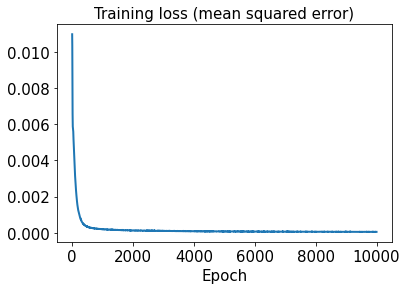

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

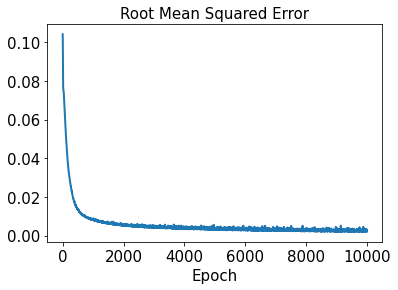

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 3.7578e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00044005387


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.027978102


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

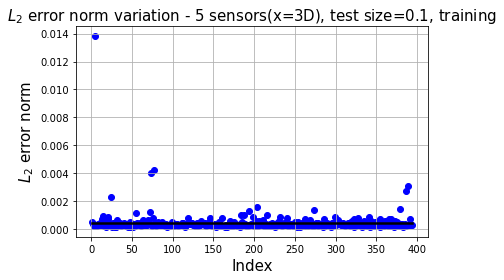

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=3D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

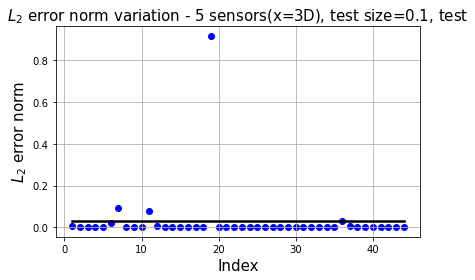

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=3D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

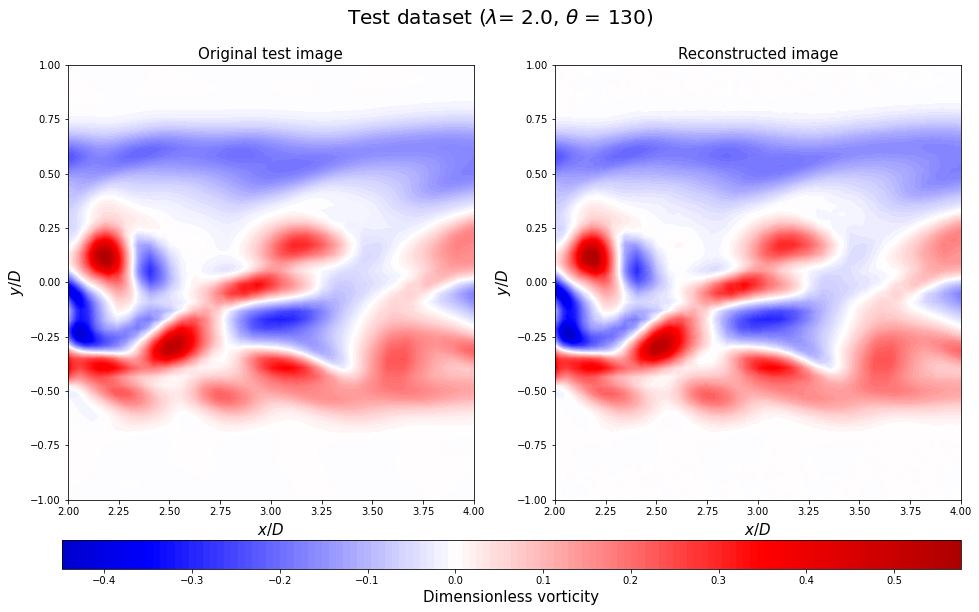

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

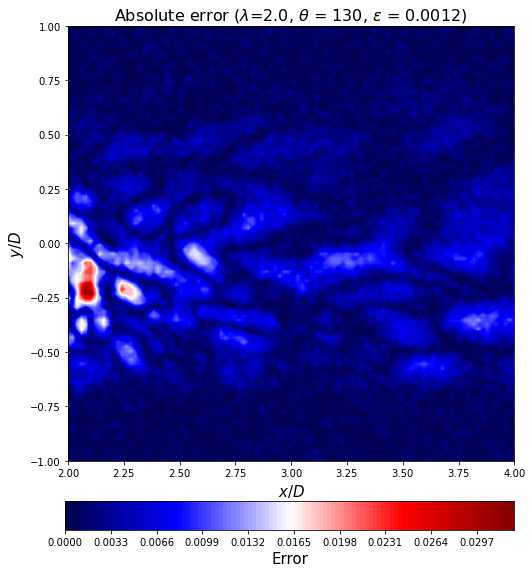

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()